In [1]:
import os
import numpy as np
import pandas as pd
import cv2
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torchvision.models.feature_extraction import create_feature_extractor
import torchvision.models as models
# from torchsummary import summary
from torch.utils.data import RandomSampler
from torchvision.utils import make_grid



# import albumentations as A
# from albumentations.pytorch import ToTensorV2


device = torch.device('cpu')

In [2]:
train_dir = "C:\\Users\\Diamondman\\Downloads\\archive\\train"
test_dir = "C:\\Users\\Diamondman\\Downloads\\archive\\test"
val_dir = "C:\\Users\\Diamondman\\Downloads\\archive\\valid"

(-0.5, 223.5, 223.5, -0.5)

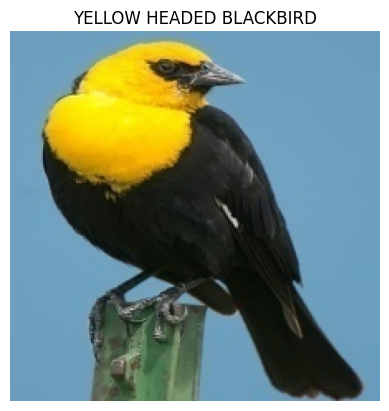

In [3]:
img = plt.imread("C:\\Users\\Diamondman\\Downloads\\archive\\train\\YELLOW HEADED BLACKBIRD\\159.jpg")
plt.imshow(img)
plt.title('YELLOW HEADED BLACKBIRD')
plt.axis("off")

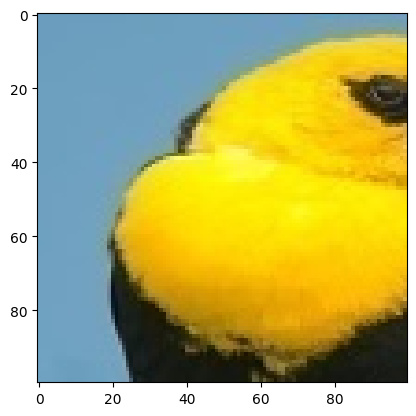

In [7]:
# manual crop 
plt.imshow(img[:100,:100])

In [164]:
def random_crop(image, crop_size:tuple, number_of_crops:int, verbos:bool):
    img_crops = []
    img_height, img_width = image.shape[0], image.shape[1]
    crop_height, crop_width = crop_size[0], crop_size[1]
    # handaling crop size not in range of image height 
    if crop_height > img_height:
        randCropHeightFactor = random.random()
        temp_h = crop_height
        crop_height = int(img_height * randCropHeightFactor)
        print(f'crop height {temp_h} is larger then image height {img_height}\ncrop height set to {crop_height}')
    # handaling crop size not in range of image width 
    if crop_width > img_width:
        randCropwidthFactor = random.random()
        temp_w = crop_width
        crop_width = int(img_width * randCropwidthFactor)
        print(f'crop width {temp_w} is larger then image width {img_width}\ncrop wight set to {crop_width}')

    for i in range(number_of_crops):
        # calculating the maximal value for left upper corner of the croping rectangle (x,y)
        max_x = img_width - crop_width
        max_y = img_height - crop_height
        # left upper corner coordinate    
        x_start, y_start = random.randrange(0, max_x), random.randrange(0, max_y )
        # bottom right corner coordinate 
        x_end = x_start + crop_width 
        y_end = y_start + crop_height
        # cuting ractangle from image
        crop = image[y_start:y_end, x_start:x_end].copy()
        img_crops.append(crop) 
    if verbos: 
            print('---------random crop summary---------\n')
            print(f'crated new {number_of_crops} cropes succesfully')
            plt.title('Crop smaple')
            plt.axis("off") 
            plt.imshow(img_li[0])
    return img_crops


crop height 300 is larger then image height 224
crop height set to 56
crop width 300 is larger then image width 224
crop wight set to 19
---------random crop summary---------

crated new 10 cropes succesfully


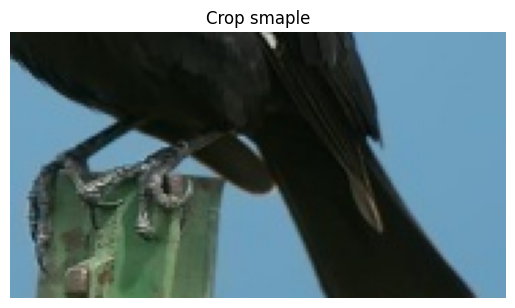

In [165]:
img_li = random_crop(img,crop_size=(300,300),number_of_crops=10, verbos=True)

In [158]:
img0 = img_li[0].copy()

In [160]:
img0 = img0/255.0

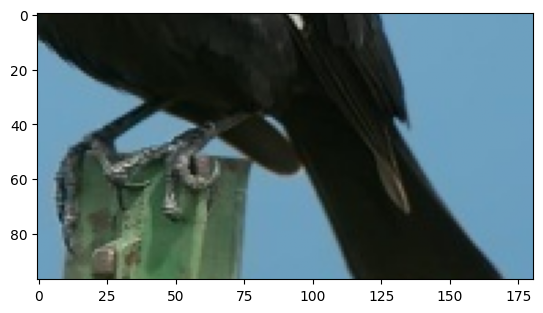

In [161]:
plt.imshow(img0)

TypeError: type numpy.ndarray doesn't define __round__ method